# Table of Contents:
1. [Introduction](#section-one)
    - [Problem Statement](#subsection-one)
    - [About Project](#subsection-two)
    - [Objectives of project](#subsection-three)
2. [Prepare Data for Consumption](#section-two)
    - [Import Libraries](#subsection-five)
    - [Meet and Greet Data](#subsection-six)
    - [Data Cleaning](#subsection-seven)
3. [Data Visualization](#section-three)
    - [Duration of calls vs Job roles](#subsection-eight)
    - [Campaign vs Duration calls](#subsection-nine)
    - [Campaign vs Month](#subsection-ten)
    - [Distribution of Quarterly Indicators](#subsection-eleven)
    - [Marital Status vs Price index](#subsection-twelve)
    - [Positive deposits vs attributes](#subsection-thirteen)
    - [Correlation plot of attributes](#subsection-fourteen)
4. [Feature Engineering](#section-four)
    - [Handling Outliers](#subsection-fifteen)
    - [Education- category clubbing](#subsection-sixteen)
    - [Encoding - Month and Day of week](#subsection-seventeen)
    - [Encoding 999 in pdays as 0](#subsection-eighteen)
    - [Ordinal Number Encoding](#subsection-nineteen)
    - [Ordinal Encoding](#subsection-twenty)
    - [Frequency encoding](#subsection-twentyone)
    - [Target Guided Ordinal Encoding](#subsection-twentytwo)
    - [Standardization of numerical variables](#subsection-twentythree)
    - [Feature Selection](#subsection-twentyfour)
    - [Train and Test Split (80:20)](#subsection-twentyfive)
5. [Modelling our Data](#section-five)
    - [Model Selection](#subsection-twentysix)
    - [Logistic regression with Hyperparameter tuning](#subsection-twentyseven)
    - [Support vector classifier](#subsection-twentyeight)
6. [Conclusion](#section-six)
    

<a id="section-one"></a>
# Introduction

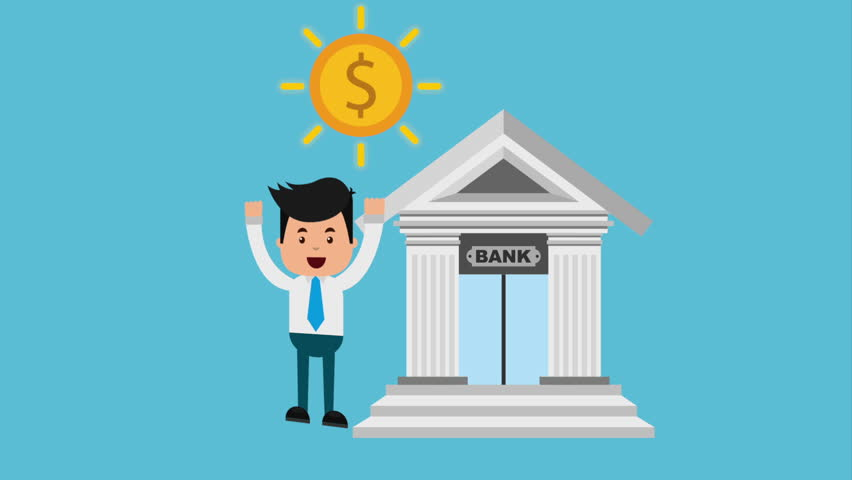
<a id="subsection-one"></a>
## Problem Statement
There has been a revenue decline for the Portuguese bank and they would like to know what actions to take. After investigation, we found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing effort on such clients.

## About Dataset 
It is a dataset that describing Portugal bank marketing campaigns results.Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit. If after all marking afforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'

Source of the data:
https://archive.ics.uci.edu/ml/datasets/bank+marketing
<a id="subsection-two"></a>
# About Project
In this project, I will analyze the Bank lead's dataset and create a classification algorithm with full end feature engineering and EDA

## Project Summary:
I'm a Data Analyst of XYZ consultancy Ltd. The ABC Portugal Bank approached our service and requested us to create a classfication algorithm to automatically place their prospective leads on having a term deposit in their bank. We will be creating a classification algorithm and also suggest them the insights we derive from this dataset and also help them to narrow down their leads into marketing funnel and in the end make a term deposit.
<a id="subsection-three"></a>
# Objectives of project:

* Meet and Greet Data
* Prepare the Data for consumption (Feature Engineering and Selection)
* Perform Exploratory Analysis (Visualizations)
* Model the Data using Machine Learning
* Validate and implement data model
* Optimize and Strategize

<a id="section-two"></a>
# Prepare Data for Consumption
<a id="subsection-five"></a>
## Import Libraries

Let's import all necessary libraries for the analysis and along with it let's bring down our dataset

In [ ]:
## Database Phase
import pandas as pd
import numpy as np

# Machine Learning Phase
import sklearn 
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#Metrics Phase
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

#Visualization Phase
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
pd.set_option('display.max_columns', 500)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

<a id="subsection-six"></a>
## Meet and Greet data

Our first step is to create the get the csv and welcome it. Later we should dissect and perform descriptive analyis. Well that escalated quickly.

In [ ]:
bank=pd.read_csv("../input/bank-marketing-campaigns-dataset/bank-additional-full.csv",sep=';')
bank_copy=bank.copy()

## print shape of dataset with rows and columns and information 
print ("The shape of the  data is (row, column):"+ str(bank_copy.shape))
print (bank_copy.info())

**Dataset:** 

We have 4118 instances and 21 features. The information says there are no null values. Fishy right? anyway we will strictly scrutinize each feature and check for suspicious records and manipulate them

**Attributes:**
**Bank client data:**

1. **Age** : Age of the lead (numeric)
2. **Job** : type of job (Categorical) 
3. **Marital** : Marital status (Categorical)
4. **Education** :  Educational Qualification of the lead (Categorical)
5. **Default:** Does the lead has any default(unpaid)credit (Categorical)
6. **Housing:** Does the lead has any housing loan? (Categorical) 
7. **loan:** Does the lead has any personal loan? (Categorical)

**Related with the last contact of the current campaign:**

8. **Contact:** Contact communication type (Categorical)
9. **Month:** last contact month of year (Categorical) 
10. **day_of_week:** last contact day of the week (categorical)
11. **duration:** last contact duration, in seconds (numeric). 

**Important note:** Duration highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

**Other attributes:**

12. **campaign:** number of contacts performed during this campaign and for this client (numeric)
13. **pdays:** number of days that passed by after the client was last contacted from a previous campaign(numeric; 999 means client was not previously contacted))
14. **previous:** number of contacts performed before this campaign and for this client (numeric)
15. **poutcome:** outcome of the previous marketing campaign (categorical)

**Social and economic context attributes**

16. **emp.var.rate:** employment variation rate - quarterly indicator (numeric)
17. **cons.price.idx:** consumer price index - monthly indicator (numeric)
18. **cons.conf.idx:** consumer confidence index - monthly indicator (numeric)
19. **euribor3m:** euribor 3 month rate - daily indicator (numeric)
20. **nr.employed:** number of employees - quarterly indicator (numeric)

**Output variable (desired target):**

21. **y** - has the client subscribed a term deposit? (binary: 'yes','no')

Let's check out the general overview of the dataframe

In [ ]:
bank_copy.head()

In [ ]:
bank_copy.dtypes

In [ ]:
#Checking out the statistical parameters
bank_copy.describe()

In [ ]:
#Checking out the categories and their respective counts in each feature
print("Job:",bank_copy.job.value_counts(),sep = '\n')
print("-"*40)
print("Marital:",bank_copy.marital.value_counts(),sep = '\n')
print("-"*40)
print("Education:",bank_copy.education.value_counts(),sep = '\n')
print("-"*40)
print("Default:",bank_copy.default.value_counts(),sep = '\n')
print("-"*40)
print("Housing loan:",bank_copy.housing.value_counts(),sep = '\n')
print("-"*40)
print("Personal loan:",bank_copy.loan.value_counts(),sep = '\n')
print("-"*40)
print("Contact:",bank_copy.contact.value_counts(),sep = '\n')
print("-"*40)
print("Month:",bank_copy.month.value_counts(),sep = '\n')
print("-"*40)
print("Day:",bank_copy.day_of_week.value_counts(),sep = '\n')
print("-"*40)
print("Previous outcome:",bank_copy.poutcome.value_counts(),sep = '\n')
print("-"*40)
print("Outcome of this campaign:",bank_copy.y.value_counts(),sep = '\n')
print("-"*40)

**Insights:**

* We got `unknown` category in each feature, we should figure out how to deal with that
* This campaign only operated during weekdays
* I can't understand what is `non-existent` category in previous outcome aka `poutcome`, if you have figured out what is it let me know in the comments.

<a id="subsection-seven"></a>
# Data Cleaning
## Checking for missing values
First lets check it visually

In [ ]:
import missingno as msno 
msno.matrix(bank_copy)

Looks like we don't have any null values except one. But plots sometimes deceive us, numbers don't. Let's check with the numbers

In [ ]:
print('Data columns with null values:',bank_copy.isnull().sum(), sep = '\n')

We have the records of null values and looks like **we don't have any null values.**

<a id="section-three"></a>
# Data Visualization
Since we have much numerical data, let's keep our plots much targetted towards our machine learning models. Also let's figure out which feature importances and prune away least important ones
<a id="subsection-eight"></a>
## Duration of calls vs Job roles

In [ ]:
import plotly.express as px

fig = px.box(bank_copy, x="job", y="duration", color="y")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

**Insights:**
* The leads who have not made a deposit have lesser duration on calls
* Comparing the average, the blue collar, entrepreneur have high duration in calls and student, retired have less duration in average
* Large distribution of leads were from self employed clients and management people.

<a id="subsection-nine"></a>
## Campaign vs Duration calls

In [ ]:
fig = px.scatter(bank_copy, x="campaign", y="duration", color="y")
fig.show()

**Insights:**
* The more the duration the calls were, they had higher probability in making a deposit
* Duration of calls faded as the time period of campaign extended further
* There were many positive leads in the initial days of campaign 

<a id="subsection-ten"></a>
## Campaign vs Month

In [ ]:
plt.bar(bank_copy['month'], bank_copy['campaign'])

**Insights:**
* We can see the campaign were mostly concentrated in the starting of the bank period ( May, June and July)
* Usually education period starts during that time so there is a possibility that parents make deposits in the name of their children
* They also have made their campaign in the end of the bank period.

<a id="subsection-eleven"></a>
## Distribution of Quarterly Indicators

In [ ]:
plt.subplot(231)
sns.distplot(bank_copy['emp.var.rate'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(bank_copy['cons.price.idx'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(bank_copy['cons.conf.idx'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(bank_copy['euribor3m'])
fig = plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(bank_copy['nr.employed'])
fig = plt.gcf()
fig.set_size_inches(10,10)

**Insights:**
* We can see there is a high employee variation rate which signifies that they have made the campaign when there were high shifts in job due to conditions of economy
* The Consumer price index is also good which shows the leads where having good price to pay for goods and services may be that could be the reason to stimulate these leads into making a deposit and plant the idea of savings
* Consumer confidence index is pretty low as they don't have much confidence on the fluctuating economy
* The 3 month Euribor interest rate is the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months. In our case the interest rates are high for lending their loans 
* The number of employees were also at peak which can increase their income index that could be the reason the campaign targetted the leads who were employeed to make a deposit


<a id="subsection-twelve"></a>
## Marital Status vs Price index

In [ ]:
sns.violinplot( y=bank_copy["marital"], x=bank_copy["cons.price.idx"] )

**Insights:**
* There are very minute differences among the price index
* Married leads have considerably have an upper hand as they have index contributing as couple 


<a id="subsection-thirteen"></a>
## Positive deposits vs attributes

In [ ]:
bank_yes = bank_copy[bank_copy['y']=='yes']


df1 = pd.crosstab(index = bank_yes["marital"],columns="count")    
df2 = pd.crosstab(index = bank_yes["month"],columns="count")  
df3= pd.crosstab(index = bank_yes["job"],columns="count") 
df4=pd.crosstab(index = bank_yes["education"],columns="count")

fig, axes = plt.subplots(nrows=2, ncols=2)
df1.plot.bar(ax=axes[0,0])
df2.plot.bar(ax=axes[0,1])
df3.plot.bar(ax=axes[1,0])
df4.plot.bar(ax=axes[1,1])       

**Insights:**
* Married leads have made high deposits followed by single
* There were much deposist made during may month as it is the start of bank period
* Leads who work in administrative position made deposits followed by technicians and blue collar employees
* Leads who had atleast university degree had made te deposits followed by highschool


<a id="subsection-fourteen"></a>
## Correlation plot of attributes

In [ ]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(bank_copy.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

**Insights:**
* The indicators have correlation among themselves
* Number of employees rate is highly correlated with employee variation rate
* Consumer price index is highly correlated with bank interest rate( higher the price index, higher the interest rate)
* Employee variation rate also correlates with the bank interest rates



<a id="section-four"></a>
# Feature Engineering
<a id="subsection-fifteen"></a>
## Handling outliers
Let's check out our numerical feature outliers through boxplot

In [ ]:
plt.figure(figsize = (15, 30))
plt.style.use('seaborn-white')
ax=plt.subplot(521)
plt.boxplot(bank_copy['age'])
ax.set_title('age')
ax=plt.subplot(522)
plt.boxplot(bank_copy['duration'])
ax.set_title('duration')
ax=plt.subplot(523)
plt.boxplot(bank_copy['campaign'])
ax.set_title('campaign')
ax=plt.subplot(524)
plt.boxplot(bank_copy['pdays'])
ax.set_title('pdays')
ax=plt.subplot(525)
plt.boxplot(bank_copy['previous'])
ax.set_title('previous')
ax=plt.subplot(526)
plt.boxplot(bank_copy['emp.var.rate'])
ax.set_title('Employee variation rate')
ax=plt.subplot(527)
plt.boxplot(bank_copy['cons.price.idx'])
ax.set_title('Consumer price index')
ax=plt.subplot(528)
plt.boxplot(bank_copy['cons.conf.idx'])
ax.set_title('Consumer confidence index')
ax=plt.subplot(529)
plt.boxplot(bank_copy['euribor3m'])
ax.set_title('euribor3m')
ax=plt.subplot(5,2,10)
plt.boxplot(bank_copy['nr.employed'])
ax.set_title('No of employees')


We see that many features doesn't have much outliers except for age,duration and campaign. So, let's fix only those features using IQR method.

In [ ]:
numerical_features=['age','campaign','duration']
for cols in numerical_features:
    Q1 = bank_copy[cols].quantile(0.25)
    Q3 = bank_copy[cols].quantile(0.75)
    IQR = Q3 - Q1     

    filter = (bank_copy[cols] >= Q1 - 1.5 * IQR) & (bank_copy[cols] <= Q3 + 1.5 *IQR)
    bank_copy=bank_copy.loc[filter]

In [ ]:
plt.figure(figsize = (15, 10))
plt.style.use('seaborn-white')
ax=plt.subplot(221)
plt.boxplot(bank_copy['age'])
ax.set_title('age')
ax=plt.subplot(222)
plt.boxplot(bank_copy['duration'])
ax.set_title('duration')
ax=plt.subplot(223)
plt.boxplot(bank_copy['campaign'])
ax.set_title('campaign')

Now that we have removed outliers, we can proceed for more feature engineering techniques.

<a id="subsection-sixteen"></a>
## Education- category clubbing

Here we are clubbing category in education such as 'basic.9y','basic.6y','basic.4y' to 'middle school' 

In [ ]:
bank_features=bank_copy.copy()
lst=['basic.9y','basic.6y','basic.4y']
for i in lst:
    bank_features.loc[bank_features['education'] == i, 'education'] = "middle.school"

bank_features['education'].value_counts()

Great, we have clubbed all the categories in education into one

<a id="subsection-seventeen"></a>
## Encoding - Month and Day of week

Encoding the categories in month and day of week to the respective numbers.

In [ ]:
month_dict={'may':5,'jul':7,'aug':8,'jun':6,'nov':11,'apr':4,'oct':10,'sep':9,'mar':3,'dec':12}
bank_features['month']= bank_features['month'].map(month_dict) 

day_dict={'thu':5,'mon':2,'wed':4,'tue':3,'fri':6}
bank_features['day_of_week']= bank_features['day_of_week'].map(day_dict) 

In [ ]:
bank_features.loc[:, ['month', 'day_of_week']].head()

We have hard encoded the month and day of week features

<a id="subsection-eighteen"></a>
## Encoding 999 in pdays as 0

Encoding 999 in pdays feature( i.e clients who haven't been contacted for the previous campaign) into 0

In [ ]:
bank_features.loc[bank_features['pdays'] == 999, 'pdays'] = 0

In [ ]:
bank_features['pdays'].value_counts()

We have converted 999 to 0 in pdays

<a id="subsection-nineteen"></a>
## Ordinal Number Encoding
Here we are gonna encode the features which has yes,no and unknown. We'll assign yes:1,no:0 and unknown:-1

In [ ]:
dictionary={'yes':1,'no':0,'unknown':-1}
bank_features['housing']=bank_features['housing'].map(dictionary)
bank_features['default']=bank_features['default'].map(dictionary)
bank_features['loan']=bank_features['loan'].map(dictionary)

In [ ]:
dictionary1={'no':0,'yes':1}
bank_features['y']=bank_features['y'].map(dictionary1)

In [ ]:
bank_features.loc[:,['housing','default','loan','y']].head()

We have encoded the yes/no features with hard encoding 

<a id="subsection-twenty"></a>
## Ordinal Encoding 

In [ ]:
dummy_contact=pd.get_dummies(bank_features['contact'], prefix='dummy',drop_first=True)
dummy_outcome=pd.get_dummies(bank_features['poutcome'], prefix='dummy',drop_first=True)
bank_features = pd.concat([bank_features,dummy_contact,dummy_outcome],axis=1)
bank_features.drop(['contact','poutcome'],axis=1, inplace=True)

In [ ]:
bank_features.loc[:,['dummy_telephone','dummy_nonexistent','dummy_success']].head()

We have performed one-hot encoding for the above features and dropped the original features

<a id="subsection-twentyone"></a>
## Frequency encoding
Let's use frequency encoding with job and education features in our dataset

In [ ]:
bank_job=bank_features['job'].value_counts().to_dict()
bank_ed=bank_features['education'].value_counts().to_dict()

Converted the frequency into key value pairs. Let's map them

In [ ]:
bank_features['job']=bank_features['job'].map(bank_job)
bank_features['education']=bank_features['education'].map(bank_ed)


In [ ]:
bank_features.loc[:,['job','education']].head()

We have encoded the job and education feature based on its frequency 

<a id="subsection-twentytwo"></a>
## Target Guided Ordinal Encoding
Lets encode marital feature based on the target 'y' . First let's find the mean of target with respect to  marital feature


In [ ]:
bank_features.groupby(['marital'])['y'].mean()

In [ ]:
ordinal_labels=bank_features.groupby(['marital'])['y'].mean().sort_values().index
ordinal_labels

We have sorted the categories based on the mean with respect to our outcome

In [ ]:
ordinal_labels2={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels2

Changed into key:value pairs, let's map them

In [ ]:
bank_features['marital_ordinal']=bank_features['marital'].map(ordinal_labels2)
bank_features.drop(['marital'], axis=1,inplace=True)

In [ ]:
bank_features.marital_ordinal.value_counts()

We have encoded the marital feature

<a id="subsection-twentythree"></a>
## Standardization of numerical variables

In [ ]:
bank_scale=bank_features.copy()
Categorical_variables=['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital_ordinal']


feature_scale=[feature for feature in bank_scale.columns if feature not in Categorical_variables]


scaler=StandardScaler()
scaler.fit(bank_scale[feature_scale])

In [ ]:
scaled_data = pd.concat([bank_scale[['job', 'education', 'default', 'housing', 'loan', 'month',
       'day_of_week','y', 'dummy_telephone', 'dummy_nonexistent',
       'dummy_success', 'marital_ordinal']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(bank_scale[feature_scale]), columns=feature_scale)],
                    axis=1)
scaled_data.head()

We have scaled our numerical features as you can see from the head.

<a id="subsection-twentyfour"></a>
## Feature Selection
Let's check the feature importances and prune our features to make our model perform well.

In [ ]:
X=scaled_data.drop(['y'],axis=1)
y=scaled_data.y

model = ExtraTreesClassifier()
model.fit(X,y)

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

From the bar plot we can see the importances of features based on it's impact towards output. Let's take up the top 15 features

<a id="subsection-twentyfive"></a>
## Train and Test Split (80:20)
Let's drop the required features and split the data into train and test

In [ ]:
X=scaled_data.drop(['pdays','month','cons.price.idx','loan','housing','emp.var.rate','y'],axis=1)
y=scaled_data.y

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=1)
print("Input Training:",X_train.shape)
print("Input Test:",X_test.shape)
print("Output Training:",y_train.shape)
print("Output Test:",y_test.shape)

<a id="section-five"></a>
# Modelling our Data
Let's enter into the crucial phase of building THE machine learning model. Before checking "what could be the best algorithm for prediction" we have to decide on the "why". It is highly important.

## Why?
Our main aim is to predict whether there is a deposit made made owing to those values from the features. The output is either going to be 0 or 1. So we can decide that we can use classification models for our problem

## What ?
To decide on what can be the best possible classification models let's not waste time running models. Instead we do quality code by creating cross validation and check all the model accuracy at once. After that we will select one model based on it's accuracy.
<a id="subsection-twentysix"></a>
## Model Selection
Let's dig onto select the best classifier model 

In [ ]:
#creating the objects
logreg_cv = LogisticRegression(random_state=0)
dt_cv=DecisionTreeClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
nb_cv=BernoulliNB()
cv_dict = {0: 'Logistic Regression', 1: 'Decision Tree',2:'KNN',3:'SVC',4:'Naive Bayes'}
cv_models=[logreg_cv,dt_cv,knn_cv,svc_cv,nb_cv]


for i,model in enumerate(cv_models):
    print("{} Test Accuracy: {}".format(cv_dict[i],cross_val_score(model, X, y, cv=10, scoring ='accuracy').mean()))

From the test results, we can see high accuracy in SVC followed by Logistic regression. Let's fit and predict

<a id="subsection-twentyseven"></a>
## Logistic regression with Hyperparameter tuning
Let's fit the model in logistic regression with parameter tuning and figure out the accuracy of our model

In [ ]:
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("The mean accuracy of the model is:",best_model.score(X_test,y_test))

We have got the best parameters for the model and the mean accuracy is 92.4%

In [ ]:
logreg = LogisticRegression(C=0.18420699693267145, random_state=0)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

92% accurate. That's really good. Let's check out confusion matrix and see the classification report

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",confusion_matrix)
print("Classification Report:\n",classification_report(y_test, y_pred))

**Insights:**

* The Confusion matrix result is telling us that we have **6399+178** correct predictions and **397+139** incorrect predictions.
* The Classification report reveals that we have **94%** precision which means the accuracy that the model classifier not to label an instance positive that is actually negative which is important as we shouldn't label a lead as positive in making a term deposit when he/she isn't interested in making a deposit

### ROC Curve
Let's check out the performance of our model through ROC curve

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

From the ROC curve we can infer that our logistic model has classified the prospective leads who made deposit correctly rather than predicting false positive. The more the ROC curve(red) lies towards the top left side the better our model is. We can choose any value between **0.8 to 0.9** for the threshold value which can reap us true positive results

<a id="subsection-twentyeight"></a>
## Support vector classifier
Let's fit our best model from model selection and predict outcome.

**Note: Hyperparameter tuning of SVM took more than hours to run in my device. So I'm bypassing hyperparameter tuning for this section.**

In [ ]:
svc_classifier = SVC(random_state = 0)
svc_classifier.fit(X_train,y_train)
y_pred=svc_classifier.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test,y_pred))

We have 91% accuracy and Also we have 92% precision

<a id="section-six"></a>
# Conclusion
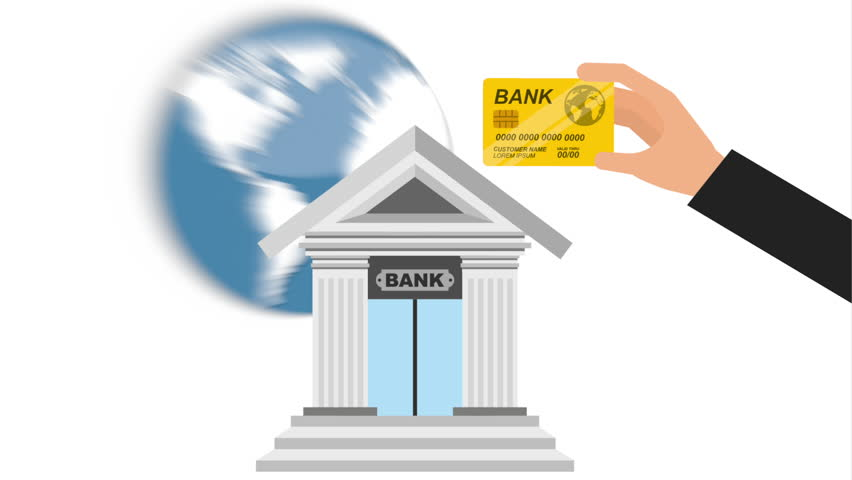
From the EDA and model selection part we can clearly identify duration playing an important attribute in defining the outcome of our dataset. It is absolute that the more the leads are interested in starting a deposit will have higher number of calls and the call duration will be higher than the average. We have also figured out that job and education also acts as a crucial deciding factor and influences the outcome alot.

Here are the few recommendations for the bank than can help improve the deposit rate

* Classify job roles based on corporate tiers and approach all tier 1 employees within few days after the campaign commences
* Listen to the leads and extract more information to deliver the best deposit plan, which can increase the duration of calls and that can lead to a deposit
* Approaching the leads during the start of new bank period(May-July) will be a good choice as many have shown positive results from data history
* Tune the campaign according to the national econometrics, don't chanelize the expenses on campaign when the national economy is performing poor


## Please leave critical feedback in comment section, also check out my [other notebooks](https://www.kaggle.com/notebooks?sortBy=dateRun&group=profile&pageSize=20)